<a href="https://colab.research.google.com/github/rfadhila07/Test-result/blob/main/gaussian_RMSprop_0.001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/ 

/content/drive/MyDrive


In [ ]:
ls

'1101174267 m rifqi fadhila mixer.pdf'
'1101174267_Muhammad Rifqi F_2_TT4107.pdf'
'1101174267_MuhammadRifqiFadhila_1&3_TT4107.pdf'
 1101174267_MuhammadRifqiFadhila_3.3_TT4107.pdf
'1101174267_muhammad rifqi fadhila_Filter2.jpg'
'1101174267 muhammad rifqi fadhila OSILATOR.pdf'
'1101174267 muhammad rifqi fadhila penguat.pdf'
'1101174267_Muhammad Rifqi Fadhila_Proposal Tugas Akhir dan lembar pemeriksaan.pdf'
 best_weight_scene_EfficientNetB0.h5
 CLAHE/
 Classroom/
 Dataset/
 DSC_7396.JPG
 Gaussian/
'Getting started.pdf'
 IMG-20210217-WA0001.jpg
'MPTI 2021'/
 Normalized/
'PMMB2021_BATCH1_1101174267_MUHAMMAD RIFQI FADHILA.rar'
 Screenshot_20210217-060246.jpg
 TT_41_07_101174267_MUHAMMADRIFQIFADHILA.pdf
 Valo/
 Visualizable/


In [8]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
from skimage import io
from skimage.filters import gaussian
from skimage import exposure
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
#Normalized dataset
import PIL.Image as pil_image
import io
path ='/content/drive/MyDrive/Dataset/Normal/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    array=np.array(img)
    max_val=np.amax(array)
    normalized=(array/max_val)
    im = pil_image.fromarray(normalized)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/Normalized/Normal/ ' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/Normalized/Normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/Normalized/Normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1
print("Normalized Success")

Normalized Success


In [ ]:
#Gaussian Filter
import cv2
from skimage import io
from skimage.filters import gaussian
path ='/content/drive/MyDrive/Normalized/Normal/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    gausfilter = gaussian(img, sigma=1, mode='constant', cval=0.0)
    im = Image.fromarray(gausfilter)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/Gaussian/Normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/Gaussian/Normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/Gaussian/Normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Denoissing Success")

Denoissing Success


In [ ]:
#CLAHE
from skimage import exposure
path ='/content/drive/MyDrive/Gaussian/Normal/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/CLAHE/Normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/CLAHE/Normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/CLAHE/Normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

CLAHE Success


In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Gaussian")
data = []
labels = []

[INFO] loading images...


In [10]:
import cv2

im = cv2.imread('/content/drive/MyDrive/Gaussian/Covid/IM00001.tif', -1)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

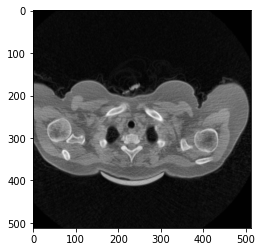

In [ ]:

plt.imshow(im_rgb)

In [11]:

width = 224
height = 224
dsize = (width, height)
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
    image = cv2.imread(imagePath,-1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = image.convert('L')
    image = cv2.resize(image,dsize)
    image = np.array(image)
    data.append(image)

  # extract the class label from the file path and update the
	# labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [12]:
print(labels)

['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 

Normal


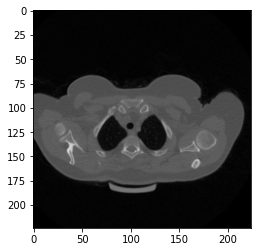

In [13]:

print(labels[500])
plt.imshow(data[10])

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [15]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [16]:
data = np.array(data)
data.shape

(1000, 224, 224, 3)

In [17]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(750, 224, 224, 3)
(250, 224, 224, 3)
(750,)
(250,)


In [18]:
print(trainX[0])

[[[0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  ...
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]]

 [[0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  ...
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]]

 [[0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [2.997997e-10 2.997997e-10 2.997997e-10]
  ...
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]]

 ...

 [[0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [7.273475e-10 7.273475e-10 7.273475e-10]
  ...
  [0.000000e+00 0.000000e+00 0.000000e+00]
  [0.000000e+00 0.

In [48]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

from keras.applications.efficientnet import EfficientNetB0
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.applications.resnet import ResNet50
import tensorflow as tf


In [49]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
out = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 224, 224, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, 224, 224, 3)  7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_4[0][0]            
____________________________________________________________________________________________

In [50]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_EfficientNetB0.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [51]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(224*224*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               15052900  
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 15,054,839
Trainable params: 15,054,839
Non-trainable params: 0
_________________________________________________________________


In [53]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = RMSprop(learning_rate=0.001, decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
24/24 [==============================] - 1s 31ms/step - loss: 27.5861 - accuracy: 0.5209 - val_loss: 3.9085 - val_accuracy: 0.5800

Epoch 00001: val_accuracy improved from -inf to 0.58000, saving model to best_weight_scene_EfficientNetB0.h5
Epoch 2/50
24/24 [==============================] - 0s 20ms/step - loss: 1.5411 - accuracy: 0.8057 - val_loss: 2.7309 - val_accuracy: 0.7000

Epoch 00002: val_accuracy improved from 0.58000 to 0.70000, saving model to best_weight_scene_EfficientNetB0.h5
Epoch 3/50
24/24 [==============================] - 0s 20ms/step - loss: 3.4951 - accuracy: 0.7146 - val_loss: 0.5371 - val_accuracy: 0.8960

Epoch 00003: val_accuracy improved from 0.70000 to 0.89600, saving model to best_weight_scene_EfficientNetB0.h5
Epoch 4/50
24/24 [==============================] - 0s 20ms/step - loss: 0.9946 - accuracy: 0.8733 - val_loss: 2.1503 - val_accuracy: 0.5680

Epoch 00004: val_accuracy did not improve from 0.89600
Epoch 5/50
24/24

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


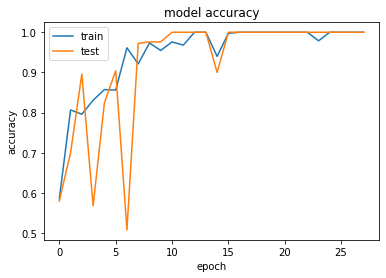

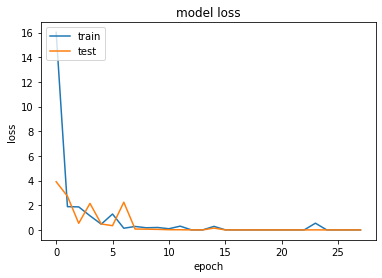

In [54]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
predictions = model.predict(testX, batch_size=32)

In [56]:
print(predictions.argmax(axis=1))

[1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1]


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = encoder.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00       123
      Normal       1.00      1.00      1.00       127

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [59]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[123   0]
 [  0 127]]


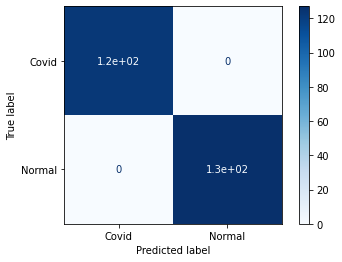

In [60]:

disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)